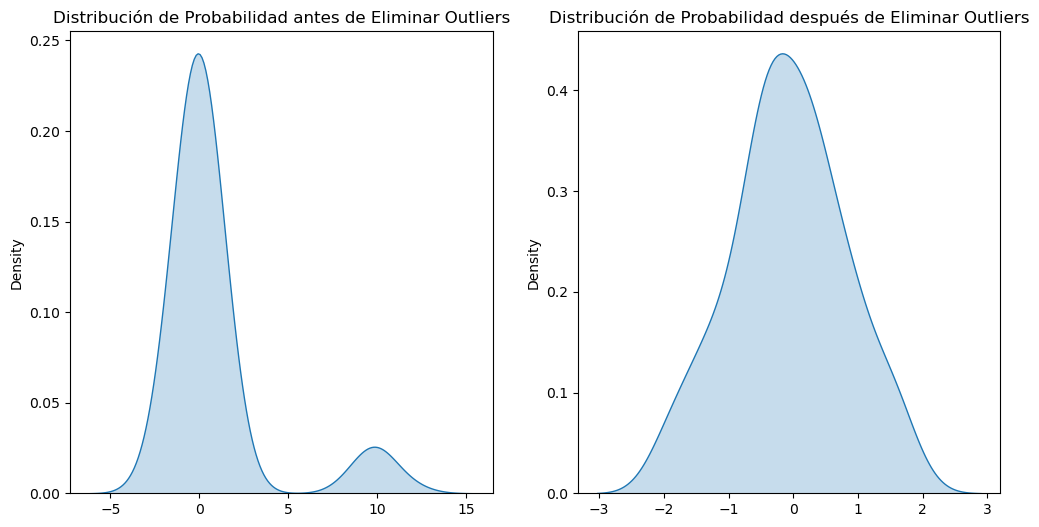

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generar datos de ejemplo con outliers
np.random.seed(42)
data = np.concatenate([np.random.normal(0, 1, 100), np.random.normal(10, 1, 10)])

# Crear un gráfico de densidad de probabilidad antes de la eliminación de outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.kdeplot(data, fill=True)
plt.title("Distribución de Probabilidad antes de Eliminar Outliers")

# Identificar y eliminar outliers (puedes personalizar tu lógica aquí)
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
data_cleaned = data[(data >= lower_bound) & (data <= upper_bound)]

# Crear un gráfico de densidad de probabilidad después de la eliminación de outliers
plt.subplot(1, 2, 2)
sns.kdeplot(data_cleaned, fill=True)
plt.title("Distribución de Probabilidad después de Eliminar Outliers")
plt.show()

In [9]:
import pandas as pd
from scipy.sparse import csr_matrix
import numpy as np

# Crear un DataFrame de ejemplo
data = {'A': [1, 0, 0, 2], 
        'B': [0, 3, 0, 4], 
        'C': [5, 0, 6, 0]}
df = pd.DataFrame(data)

# Convertir el DataFrame a una matriz NumPy
numpy_matrix = df.to_numpy()

# Convertir la matriz NumPy a una matriz dispersa (en este caso, una matriz comprimida en filas - CSR)
sparse_matrix = csr_matrix(numpy_matrix)
sparse_matrix

<4x3 sparse matrix of type '<class 'numpy.int64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [10]:
numpy_matrix

array([[1, 0, 5],
       [0, 3, 0],
       [0, 0, 6],
       [2, 4, 0]], dtype=int64)

In [12]:
pd.DataFrame.sparse.from_spmatrix(sparse_matrix)

,0,1,2
0,1,0,5
1,0,3,0
2,0,0,6
3,2,4,0


In [2]:
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
import time

# Crear una matriz NumPy densa (muchos ceros)
dense_matrix = np.random.randint(0, 2, size=(1000, 1000))

# Crear una sparse matrix de SciPy (con valores cero aleatorios)
sparse_matrix = csr_matrix(dense_matrix)

# Crear un DataFrame de pandas a partir de la matriz NumPy densa
df = pd.DataFrame(dense_matrix)

# Comparación de tiempo para la creación
print("Comparación de tiempo para la creación:")
start_time = time.time()
dense_matrix = np.random.randint(0, 2, size=(2000, 2000))
print("Tiempo para crear NumPy array denso:", time.time() - start_time)

start_time = time.time()
sparse_matrix = csr_matrix(dense_matrix)
print("Tiempo para crear SciPy sparse matrix:", time.time() - start_time)

start_time = time.time()
df = pd.DataFrame(dense_matrix)
print("Tiempo para crear DataFrame de pandas:", time.time() - start_time)

# Comparación de tiempo para multiplicación de matrices
print("\nComparación de tiempo para multiplicación de matrices:")
start_time = time.time()
result_dense = np.dot(dense_matrix, dense_matrix)
print("Tiempo para multiplicar NumPy arrays densos:", time.time() - start_time)

start_time = time.time()
result_sparse = sparse_matrix.dot(sparse_matrix)
print("Tiempo para multiplicar SciPy sparse matrices:", time.time() - start_time)

start_time = time.time()
result_df = df.dot(df)
print("Tiempo para multiplicar DataFrames de pandas:", time.time() - start_time)

# Comparación de tiempo para calcular el promedio
print("\nComparación de tiempo para calcular el promedio:")
start_time = time.time()
average_dense = np.mean(dense_matrix)
print("Tiempo para calcular el promedio en NumPy array denso:", time.time() - start_time)

start_time = time.time()
average_sparse = sparse_matrix.mean()
print("Tiempo para calcular el promedio en SciPy sparse matrix:", time.time() - start_time)

start_time = time.time()
average_df = df.mean().mean()
print("Tiempo para calcular el promedio en DataFrame de pandas:", time.time() - start_time)

Comparación de tiempo para la creación:
Tiempo para crear NumPy array denso: 0.009002447128295898
Tiempo para crear SciPy sparse matrix: 0.03818464279174805
Tiempo para crear DataFrame de pandas: 0.0

Comparación de tiempo para multiplicación de matrices:
Tiempo para multiplicar NumPy arrays densos: 4.699424505233765
Tiempo para multiplicar SciPy sparse matrices: 1.699716567993164
Tiempo para multiplicar DataFrames de pandas: 4.751300096511841

Comparación de tiempo para calcular el promedio:
Tiempo para calcular el promedio en NumPy array denso: 0.001001119613647461
Tiempo para calcular el promedio en SciPy sparse matrix: 0.010001897811889648
Tiempo para calcular el promedio en DataFrame de pandas: 0.0009999275207519531


In [18]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Cargar datos y realizar la división
data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir modelos
models = [
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("Random Forest", RandomForestClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("SVM", SVC(probability=True)),
    ("XGBoost", XGBClassifier())
]

# Evaluar modelos y encontrar el mejor
best_model = None
best_roc_auc = 0

for name, model in models:
    roc_auc_scores = cross_val_score(model, X_train, y_train, cv=10, scoring="roc_auc")
    roc_auc_mean = np.mean(roc_auc_scores)
    roc_auc_std = np.std(roc_auc_scores)
    print(f"{name}: ROC-AUC Mean = {roc_auc_mean:.4f}, ROC-AUC Std = {roc_auc_std:.4f}")
    
    if roc_auc_mean > best_roc_auc:
        best_roc_auc = roc_auc_mean
        best_model = model

# Entrenar y evaluar el mejor modelo en el conjunto de prueba
best_model.fit(X_train, y_train)
y_pred = best_model.predict_proba(X_test)[:, 1]
roc_auc_test = roc_auc_score(y_test, y_pred)

print(f"\nEl mejor modelo es '{best_model.__class__.__name__}' con ROC-AUC Mean = {best_roc_auc:.4f}")
print(f"ROC-AUC en el conjunto de prueba: {roc_auc_test:.4f}")

c:\Mamba\envs\venv_main\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Mamba\envs\venv_main\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Logistic Regression: ROC-AUC Mean = 0.9891, ROC-AUC Std = 0.0192
Random Forest: ROC-AUC Mean = 0.9876, ROC-AUC Std = 0.0141
Gradient Boosting: ROC-AUC Mean = 0.9896, ROC-AUC Std = 0.0167
SVM: ROC-AUC Mean = 0.9713, ROC-AUC Std = 0.0240
XGBoost: ROC-AUC Mean = 0.9920, ROC-AUC Std = 0.0159

El mejor modelo es 'XGBClassifier' con ROC-AUC Mean = 0.9920
ROC-AUC en el conjunto de prueba: 0.9912
